<a href="https://colab.research.google.com/github/gettokeroro/DADS6003-Homeworks/blob/main/%E0%B9%87HW2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Load Dataset


**Reasoning**:
First, I will import the pandas library to enable data manipulation with DataFrames. Then, I will load the 'leukemia_remission.txt' file into a DataFrame, assuming a tab delimiter which is common for .txt datasets, and display the first five rows to verify the loading process and inspect the data structure.



In [1]:
import pandas as pd

df = pd.read_csv('/content/leukemia_remission.txt', sep='\t')
df.head()

,REMISS,CELL,SMEAR,INFIL,LI,BLAST,TEMP
0,1,0.8,0.83,0.66,1.9,1.10,1.00
1,1,0.9,0.36,0.32,1.4,0.74,0.99
2,0,0.8,0.88,0.70,0.8,0.18,0.98
3,0,1.0,0.87,0.87,0.7,1.05,0.99
4,1,0.9,0.75,0.68,1.3,0.52,0.98


## Inspect and Preprocess Data

### Subtask:
Examine the dataset to understand its structure, identify features and the target variable. Perform necessary preprocessing steps such as handling any missing values, encoding categorical features, and scaling numerical features to prepare the data for Logistic Regression.


**Reasoning**:
The first step in preprocessing is to understand the dataset's structure, data types, and check for missing values. Using `df.info()` will provide a summary of the DataFrame, including data types and non-null counts, and `df.isnull().sum()` will explicitly show the count of missing values per column. These steps are crucial for identifying any immediate data quality issues.



In [2]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   REMISS  27 non-null     int64  
 1   CELL    27 non-null     float64
 2   SMEAR   27 non-null     float64
 3   INFIL   27 non-null     float64
 4   LI      27 non-null     float64
 5   BLAST   27 non-null     float64
 6   TEMP    27 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.6 KB
None
REMISS    0
CELL      0
SMEAR     0
INFIL     0
LI        0
BLAST     0
TEMP      0
dtype: int64


**Reasoning**:
Now that the initial inspection for data types and missing values is complete, the next steps are to separate the target variable from the features and then scale the numerical features. This is done by assigning 'REMISS' to `y` and the rest to `X`, importing `StandardScaler`, initializing it, and then fitting and transforming `X` to standardize the data.



In [3]:
y = df['REMISS']
X = df.drop('REMISS', axis=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)
print("First 5 rows of scaled features (X):\n", X[:5])

Shape of features (X): (27, 6)
Shape of target (y): (27,)
First 5 rows of scaled features (X):
 [[-0.44487587  0.92746604  0.38288037  1.95250199  0.78383399  0.17814531]
 [ 0.10110815 -1.31008986 -1.0755602   0.86329634  0.09806744 -0.5089866 ]
 [-0.44487587  1.1655039   0.55446161 -0.44375045 -0.96868053 -1.19611851]
 [ 0.64709217  1.11789633  1.28368189 -0.66159158  0.68858863 -0.5089866 ]
 [ 0.10110815  0.54660546  0.46867099  0.6454552  -0.32101212 -1.19611851]]


## Implement Logistic Regression Components

### Subtask:
Define the key mathematical components of Logistic Regression: the sigmoid (activation) function, and the binary cross-entropy loss function. Also, outline the initial steps for parameter (weights and bias) initialization.


**Reasoning**:
I will define the sigmoid activation function, the binary cross-entropy loss function, and initialize the weights and bias for Logistic Regression. These are fundamental components for implementing SGD for Logistic Regression.



In [4]:
import numpy as np

def sigmoid(z):
    """Calculates the sigmoid activation function."""
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy_loss(y_true, y_pred):
    """Calculates the binary cross-entropy loss."""
    epsilon = 1e-10  # To prevent log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon) # Clip probabilities to avoid log(0) or log(1)
    loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return np.mean(loss)

# Initialize weights (W) and bias (b)
n_features = X.shape[1]
W = np.zeros(n_features)
b = 0.0

print("Initialized Weights (W):", W)
print("Initialized Bias (b):", b)

Initialized Weights (W): [0. 0. 0. 0. 0. 0.]
Initialized Bias (b): 0.0


## Implement Stochastic Gradient Descent

### Subtask:
Detail and implement the core mechanics of Stochastic Gradient Descent (SGD). This includes calculating the gradient of the loss function with respect to the parameters for a single data point, and updating the parameters using a specified learning rate. This step will focus on the 'stochastic' aspect of updating parameters per data point.


**Reasoning**:
I will define the `compute_gradients_sgd` function to calculate gradients for a single data point and a `update_parameters` function to update weights and bias using these gradients and a learning rate. Then, I will initialize the learning rate.



In [5]:
def compute_gradients_sgd(x_i, y_i, W, b):
    """Calculates gradients for a single data point (SGD)."""
    z = np.dot(x_i, W) + b
    y_pred = sigmoid(z)

    dW = x_i * (y_pred - y_i)
    db = (y_pred - y_i)
    return dW, db

def update_parameters(W, b, dW, db, learning_rate):
    """Updates weights and bias using the calculated gradients and learning rate."""
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return W, b

# Initialize learning rate
learning_rate = 0.01

print("SGD gradient computation and parameter update functions defined.")
print("Learning rate initialized to:", learning_rate)

SGD gradient computation and parameter update functions defined.
Learning rate initialized to: 0.01


## Demonstrate Step-by-Step SGD

### Subtask:
Run the implemented SGD for a few iterations, printing or displaying the parameter updates, the loss value, and the prediction for a selected data point at each step. This will visually and numerically demonstrate how SGD iteratively adjusts parameters to minimize the loss.


**Reasoning**:
I will implement the Stochastic Gradient Descent training loop according to the instructions. This involves defining epochs, iterating through each data point to calculate predictions, loss, gradients, and update parameters, and tracking the loss over epochs.



In [6]:
n_epochs = 500
losses = []

print(f"Starting SGD training for {n_epochs} epochs...")

for epoch in range(n_epochs):
    epoch_losses = []
    for i in range(len(X)):
        x_i = X[i]
        y_i = y.iloc[i] # Accessing y as a pandas Series

        # Forward pass
        z = np.dot(x_i, W) + b
        y_pred = sigmoid(z)

        # Calculate and store loss for the current data point
        point_loss = binary_cross_entropy_loss(y_i, y_pred)
        epoch_losses.append(point_loss)

        # Compute gradients (SGD)
        dW, db = compute_gradients_sgd(x_i, y_i, W, b)

        # Update parameters
        W, b = update_parameters(W, b, dW, db, learning_rate)

    # Calculate average loss for the epoch
    avg_epoch_loss = np.mean(epoch_losses)
    losses.append(avg_epoch_loss)

    # Print progress every few epochs
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch + 1}/{n_epochs}, Average Loss: {avg_epoch_loss:.4f}")

print("\nSGD training complete.")
print("Final Weights (W):", W)
print("Final Bias (b):", b)


Starting SGD training for 500 epochs...
Epoch 50/500, Average Loss: 0.4418
Epoch 100/500, Average Loss: 0.4248
Epoch 150/500, Average Loss: 0.4185
Epoch 200/500, Average Loss: 0.4151
Epoch 250/500, Average Loss: 0.4130
Epoch 300/500, Average Loss: 0.4116
Epoch 350/500, Average Loss: 0.4106
Epoch 400/500, Average Loss: 0.4099
Epoch 450/500, Average Loss: 0.4093
Epoch 500/500, Average Loss: 0.4089

SGD training complete.
Final Weights (W): [ 1.34508796 -0.19537947  0.40545266  1.66141101  0.09217069 -1.20965118]
Final Bias (b): -1.7285014321509817


## Visualize SGD Convergence

### Subtask:
Plot the loss function value over the iterations to show how SGD converges. This visualization will help in understanding the optimization process and the effectiveness of the chosen learning rate. Ensure that the plot includes appropriate labels and a legend.


**Reasoning**:
I will plot the `losses` list to visualize the SGD convergence over epochs, as instructed. This requires importing `matplotlib.pyplot`, creating a line plot, adding appropriate labels and a title, and then displaying the plot.



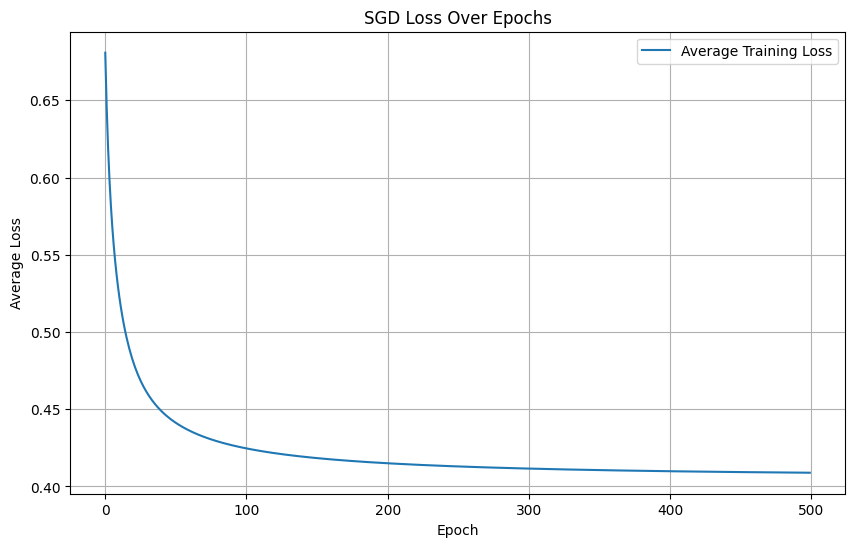

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(len(losses)), losses, label='Average Training Loss')
plt.title('SGD Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.legend()
plt.grid(True)
plt.show()